In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn nltk xgboost

Note: you may need to restart the kernel to use updated packages.


#### Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to C:\Users\DILEEP
[nltk_data]     V\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Load The Dataset

In [3]:
pd.set_option("display.max_columns",None)

In [4]:
df=pd.read_csv("C:\\Users\\DILEEP  V\\OneDrive\\Desktop\\Data_Science_Projects\\Movie Genre Data Science Project\\movie_genre_classification_final.csv")

In [5]:
# top 5 rows
df.head()

,Title,Year,Director,Duration,Rating,Votes,Description,Language,Country,Budget_USD,BoxOffice_USD,Genre,Production_Company,Content_Rating,Lead_Actor,Num_Awards,Critic_Reviews
0,Winds of Fate 4,1980,R. Lee,167,4.1,182425,A touching love story with heartwarming moments.,Spanish,China,39979615,179936008,Romance,DreamWorks,R,Kangana Ranaut,8,229
1,Firestorm 11,2014,S. Chen,166,4.1,449351,A fast-paced thriller with intense action scenes.,Korean,China,116404774,802121619,Action,Netflix,R,Kangana Ranaut,20,466
2,Silent Echo 2,2016,A. Khan,170,4.1,363328,A fast-paced thriller with intense action scenes.,Korean,Japan,166261330,225526871,Action,Pixar,PG,Amitabh Bachchan,16,539
3,City Lights 4,1982,L. Zhang,170,9.9,62371,An emotional journey exploring complex charact...,Japanese,Japan,28861315,69813738,Drama,Netflix,NC-17,Natalie Portman,15,606
4,Broken Truth 1,1990,L. Zhang,91,5.3,4600,An imaginative world filled with magic and won...,Korean,USA,43890403,375136716,Fantasy,Studio Ghibli,PG,Chris Evans,6,330


In [6]:
# bottom 5 rows
df.tail()

,Title,Year,Director,Duration,Rating,Votes,Description,Language,Country,Budget_USD,BoxOffice_USD,Genre,Production_Company,Content_Rating,Lead_Actor,Num_Awards,Critic_Reviews
49995,Ocean Call 20,2013,T. Johnson,149,6.8,340904,A touching love story with heartwarming moments.,English,UK,62456512,3291117,Romance,Yash Raj Films,PG-13,Leonardo DiCaprio,18,481
49996,Ocean Call 13,2001,M. Brown,166,7.6,214228,A spine-chilling tale that evokes fear and dread.,Japanese,South Korea,33239921,465759764,Horror,Netflix,PG-13,Emma Watson,3,84
49997,Last Mission 15,2017,J. Smith,158,9.2,251931,A light-hearted comedy that guarantees laughter.,Korean,South Korea,79589169,820566917,Comedy,Paramount Pictures,PG-13,Shah Rukh Khan,1,994
49998,Firestorm 11,1992,J. Smith,166,7.2,487956,A spine-chilling tale that evokes fear and dread.,Mandarin,South Korea,179834680,131779818,Horror,Amazon Studios,R,Kangana Ranaut,10,349
49999,Silent Echo 12,2009,P. Adams,117,4.3,392762,An imaginative world filled with magic and won...,Spanish,France,45434366,957562425,Fantasy,Sony Pictures,PG-13,Emma Watson,20,191


In [7]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               50000 non-null  object 
 1   Year                50000 non-null  int64  
 2   Director            50000 non-null  object 
 3   Duration            50000 non-null  int64  
 4   Rating              50000 non-null  float64
 5   Votes               50000 non-null  int64  
 6   Description         50000 non-null  object 
 7   Language            50000 non-null  object 
 8   Country             50000 non-null  object 
 9   Budget_USD          50000 non-null  int64  
 10  BoxOffice_USD       50000 non-null  int64  
 11  Genre               50000 non-null  object 
 12  Production_Company  50000 non-null  object 
 13  Content_Rating      50000 non-null  object 
 14  Lead_Actor          50000 non-null  object 
 15  Num_Awards          50000 non-null  int64  
 16  Crit

In [8]:
# dataset statistical info
df.describe()

,Year,Duration,Rating,Votes,Budget_USD,BoxOffice_USD,Num_Awards,Critic_Reviews
count,50000.000000,50000.00000,50000.000000,50000.000000,5.000000e+04,5.000000e+04,50000.000000,50000.000000
mean,2001.562620,130.07312,6.926472,249699.050540,9.179143e+07,5.176063e+08,9.964440,500.176380
std,12.722539,29.11097,1.698758,144314.043032,5.823888e+07,2.880283e+08,6.066303,289.971792
min,1980.000000,80.00000,4.000000,516.000000,1.135566e+06,3.291117e+06,0.000000,0.000000
25%,1991.000000,105.00000,5.500000,124531.500000,4.389040e+07,2.590329e+08,5.000000,248.000000
50%,2002.000000,130.00000,6.900000,248582.000000,8.062480e+07,5.109973e+08,10.000000,500.000000
75%,2013.000000,155.00000,8.400000,374833.500000,1.475557e+08,7.704129e+08,15.000000,751.000000
max,2023.000000,180.00000,9.900000,499984.000000,1.984445e+08,9.925159e+08,20.000000,1000.000000


In [9]:
df.describe(include="all")

,Title,Year,Director,Duration,Rating,Votes,Description,Language,Country,Budget_USD,BoxOffice_USD,Genre,Production_Company,Content_Rating,Lead_Actor,Num_Awards,Critic_Reviews
count,50000,50000.000000,50000,50000.00000,50000.000000,50000.000000,50000,50000,50000,5.000000e+04,5.000000e+04,50000,50000,50000,50000,50000.000000,50000.000000
unique,260,NaN,10,NaN,NaN,NaN,7,7,7,NaN,NaN,7,10,5,10,NaN,NaN
top,Winds of Fate 6,NaN,N. Roy,NaN,NaN,NaN,A spine-chilling tale that evokes fear and dread.,Spanish,South Korea,NaN,NaN,Horror,Yash Raj Films,PG,Natalie Portman,NaN,NaN
freq,233,NaN,5141,NaN,NaN,NaN,7260,7243,7224,NaN,NaN,7260,5142,10066,5053,NaN,NaN
mean,NaN,2001.562620,NaN,130.07312,6.926472,249699.050540,NaN,NaN,NaN,9.179143e+07,5.176063e+08,NaN,NaN,NaN,NaN,9.964440,500.176380
std,NaN,12.722539,NaN,29.11097,1.698758,144314.043032,NaN,NaN,NaN,5.823888e+07,2.880283e+08,NaN,NaN,NaN,NaN,6.066303,289.971792
min,NaN,1980.000000,NaN,80.00000,4.000000,516.000000,NaN,NaN,NaN,1.135566e+06,3.291117e+06,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,1991.000000,NaN,105.00000,5.500000,124531.500000,NaN,NaN,NaN,4.389040e+07,2.590329e+08,NaN,NaN,NaN,NaN,5.000000,248.000000
50%,NaN,2002.000000,NaN,130.00000,6.900000,248582.000000,NaN,NaN,NaN,8.062480e+07,5.109973e+08,NaN,NaN,NaN,NaN,10.000000,500.000000
75%,NaN,2013.000000,NaN,155.00000,8.400000,374833.500000,NaN,NaN,NaN,1.475557e+08,7.704129e+08,NaN,NaN,NaN,NaN,15.000000,751.000000


In [10]:
# checking for non-null values
df.isnull().sum()

Title                 0
Year                  0
Director              0
Duration              0
Rating                0
Votes                 0
Description           0
Language              0
Country               0
Budget_USD            0
BoxOffice_USD         0
Genre                 0
Production_Company    0
Content_Rating        0
Lead_Actor            0
Num_Awards            0
Critic_Reviews        0
dtype: int64

#### Exploratory DataAnalysis

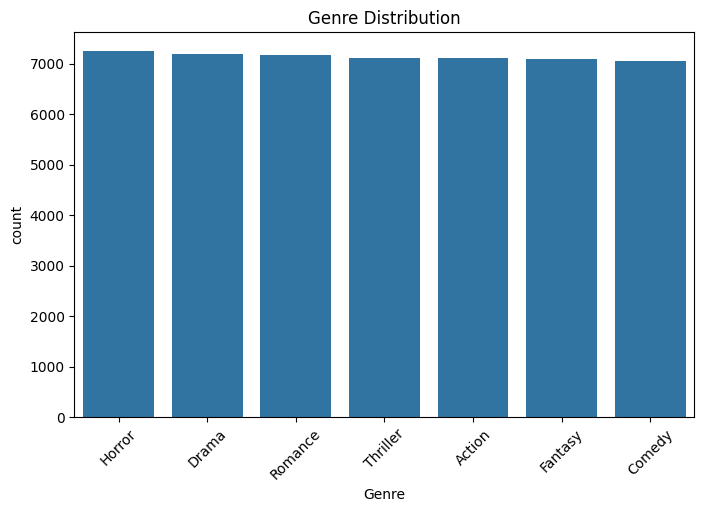

In [11]:
# Genre distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Genre', order=df['Genre'].value_counts().index)
plt.title("Genre Distribution")
plt.xticks(rotation=45)
plt.show()

#### DataCleaning

**Text Cleaning:**

In [12]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

# Apply to a text column (assuming 'Description' is present)
df['Cleaned_Description'] = df['Description'].apply(clean_text)

**Encode Target Variable**

In [13]:
le = LabelEncoder()
df['Genre_encoded'] = le.fit_transform(df['Genre'])

**TF-IDF Vectorization**

In [14]:
tfidf = TfidfVectorizer(max_features=5000)
X_text = tfidf.fit_transform(df['Cleaned_Description']).toarray()

**Train-Test Split**

In [15]:
X = X_text  # You can also combine structured data if available
y = df['Genre_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Model Training (Random Forest)**

In [16]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Model Evaluation**

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      Action       1.00      1.00      1.00      1399
      Comedy       1.00      1.00      1.00      1447
       Drama       1.00      1.00      1.00      1448
     Fantasy       1.00      1.00      1.00      1430
      Horror       1.00      1.00      1.00      1485
     Romance       1.00      1.00      1.00      1429
    Thriller       1.00      1.00      1.00      1362

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



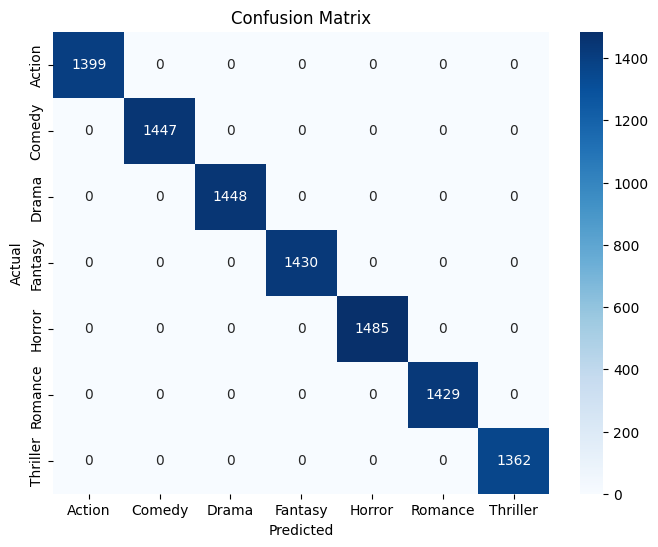

In [17]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Save Model**

In [18]:
import joblib
joblib.dump(model, "movie_genre_classifier.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")
joblib.dump(le, "label_encoder.pkl")

['label_encoder.pkl']